# YB 방학 세션_YB 커리큘럼 복습 스터디

# ch 06. 차원 축소
## 02. PCA(Principal Component Analysis)

**PCA 개요**

PCA(Principal Component Analysis)는 가장 대표적인 차원 축소 기법이다. PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Compeonent)을 추출해 차원을 축소하는 기법이다. PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다). 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트가 다음과 같이 구성돼 있다고 가정한다.

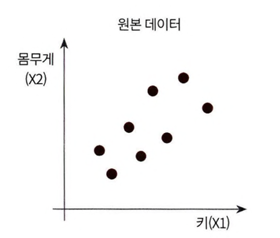

이 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 할 수 있다. 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식이다.

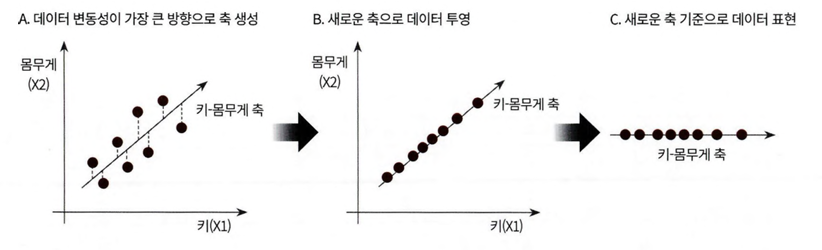

PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 각각 직각이 되는 벡터(직교 벡터)를 축으로 한다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 설정한다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.

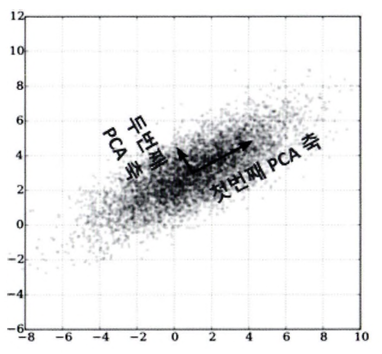

PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.

PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 고윳값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.

일반적으로 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미한다. 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것이다.

보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미한다. 즉, 사람 키 변수를 X, 몸무게 변수를 Y라고 하면 공분산 Cov(X, Y) > 0은 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미이다. 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이다.

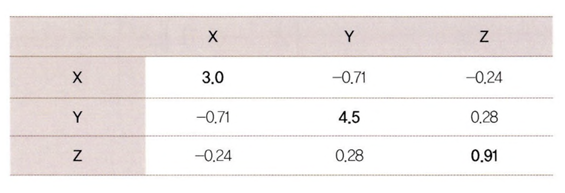

위 표에서 보면 공분산 행렬에서 대각선 원소는 각 변수(X, Y, 2)의 분산을 의미하며, 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미한다. X, Y, Z의 분산은 각각 3.0, 4.5, 0.91 이다. X와 Y의 공분산은 -0.71, X와 Z의 공분산은 -0.24, Y와 Z의 공분산은 0.28이다.

고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭한다. 즉, Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)이다. 이 고유벡터는 여러 개가 존재하고, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있다. 예를 들어 2x2 행렬은 두 개의 고유벡터를, 3x3 행렬은 3개의 고유벡터를 가질 수 있다. 이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용된다.

공분산 행렬은 정방행렬(Square Matrix)이며 대칭행렬(Symmetric Matrix)이다. 정방행렬은 열과 행이 같은 행렬을 지칭하는데, 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬, 즉 $A^{T} = A$인 행렬을 대칭행렬이라고 부른다. 공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다. 이 대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있다. 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있다는 것이다.

입력 데이터의 공분산 행렬을 C라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.

$C$ = $P$$\sum$$P^{T}$

이때 $P$는 nxn의 직교행렬이며, $\sum$는 nxn 정방행렬,  $P^{T}$는 행렬 $P$의 전치 행렬이다. 위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응된다.

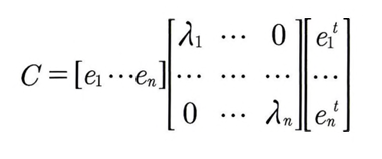

즉, 공분산 C는 고유벡터의 직교행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해된다. $e_{i}$는 $i$번째 고유벡터를, $\lambda_{i}$는 $i$번째 고유벡터의 크기를 의미한다. $e_{1}$는 가장 분산이 큰 방향을 가진 고유벡터이며, $e_{2}$는 $e_{1}$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터이다.

**입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것이다.** 보통 PCA는 다음과 같은 스텝으로 수행된다.

1. 입력 데이터 세트의 공분산 행렬을 생성한다.
2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

## 03. LDA(Linear Discriminant Analysis)

**LDA 개요**

LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다. LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소한다. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다. 다음 그림은 좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부 분산이 작은 것을 표현한 것이다.

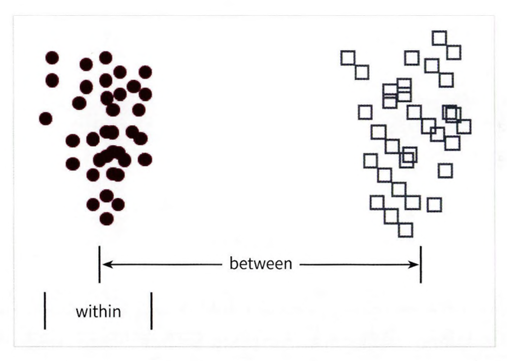

일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점이다. LDA를 구하는 스텝은 다음과 같다.

1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구한다.

2. 클래스 내부 분산 행렬을 $S_{W}$, 클래스 간 분산 행렬을 $S_{B}$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.

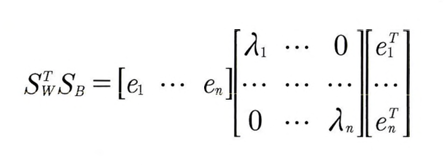

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

## 04. SVD(Singular Value Decomposition)

**SVD 개요**

SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 일반적으로 SVD는 m x n 크기의 행렬 $A$를 다음과 같이 분해하는 것을 의미한다.


$A$=$U$∑ $V^{T}$

SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가진다. ∑는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. ∑이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다. SVD는 $A$의 차원이 m x n일 때 $U$의 차원이 m x m, ∑의 차원이 m x n, $V^{T}$의 차원이 n x n으로 분해한다.

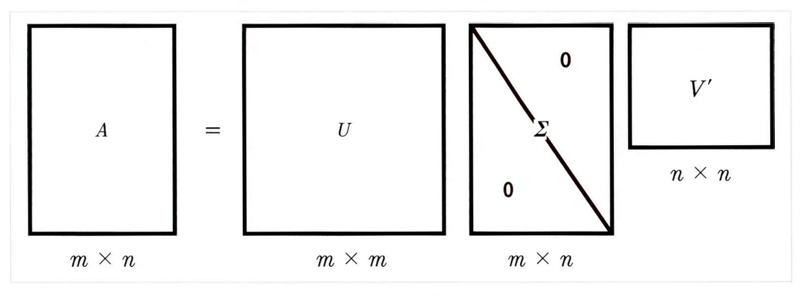

하지만 일반적으로는 다음과 같이 ∑의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 ∑에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다. 이렇게 컴팩트한 형태로  SVD를 적용하면 $A$의 차원이 m x n일 때, $U$의 차원을 m x p, ∑의 차원을 p x p, $V^{T}$의 차원을 p X n으로 분해한다.

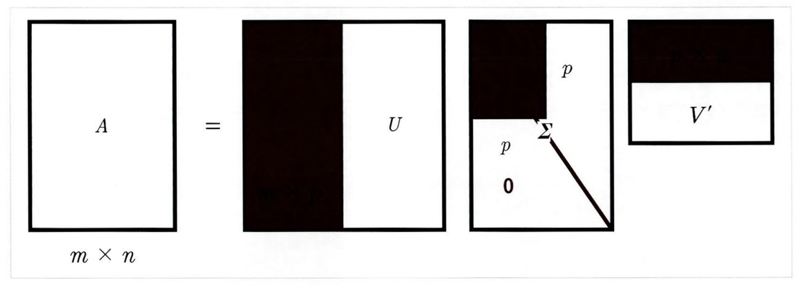

Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 $U$와 $V$의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다. 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다. 넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD로 분해가 어떤 식으로 되는지 간단한 예제를 통해 살펴보자.

넘파이의 SVD 모듈인 numpy.linalg.svd를 로딩한다. 그리고 랜덤한 4 x 4 넘파이 행렬을 생성한다. 랜덤 행렬을 생성하는 이유는 행렬의 개별 로우끼리의 의존성을 없애기 위해서이다.

## 03. 평균 이동

## 평균(Mean Shift)의 개요

평균(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.

평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)를 이용한다. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용한다.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.

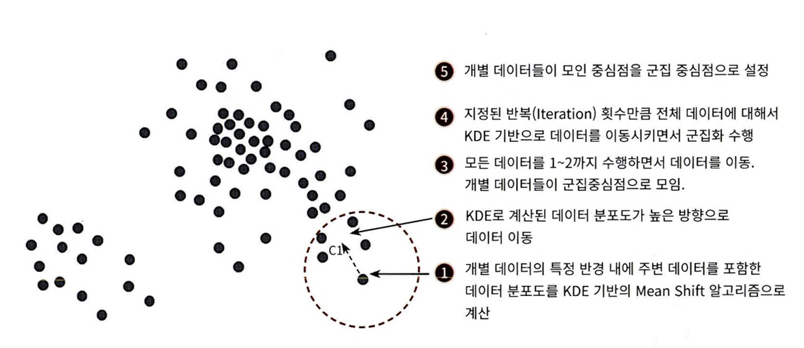

KDE(Kernel Density Estimation)는 커널(Kern이) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다. 다음 그림의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고 오른쪽은 적용 값을 모두 더한 KDE 결과이다.

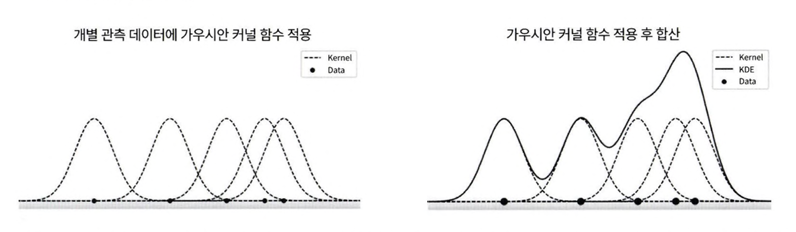

KDE는 다음과 같은 커널 함수식으로 표현된다. 다음 식에서 K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth)이다.

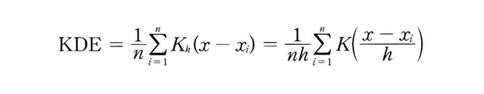

대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있습니다. 다음 그림은 h 값을 증가시키면서 변화되는 KDE를 나타낸다. 작은 h 값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다. 반대로 매우 큰 h 값(h=10)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다. 따라서 적절한 KDE의 대역 폭 으를 계산하는 것은 KDE 기반의 평균 이동(Mean Shift) 군집화에서 매우 중요하다.

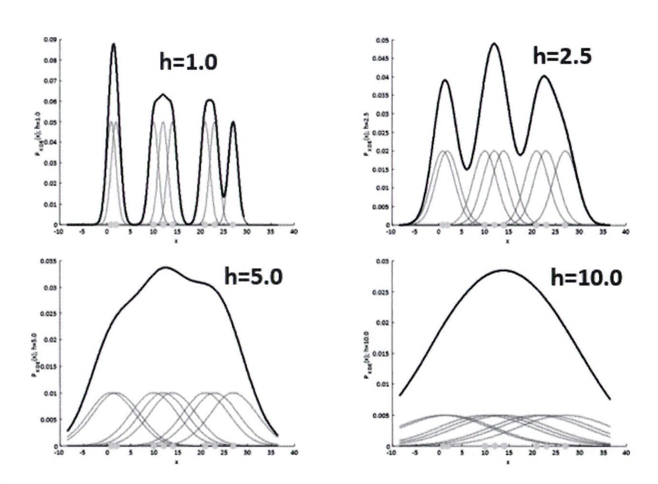

일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다. 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공한다. MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 h와 동일하다. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공한다. 다음 예제는 make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제이다.

## 04. GMM(Gaussian Mixture Model) 소개

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.
정규 분포(Normal distribu tion)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진
통계학에서 가장 잘 알려진 연속 확률 함수이다.

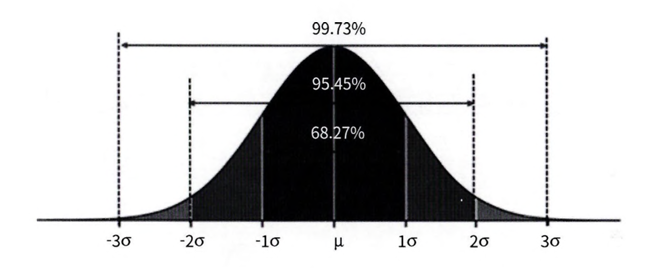

정규 분포는 평균 $\mu$를 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1 에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다. 평균이 0이고, 표준편차가 1인 정규 분포를 표준 정규 분포라고 한다.

GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다. 먼저 다음과 같이 세 개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정하겠다.

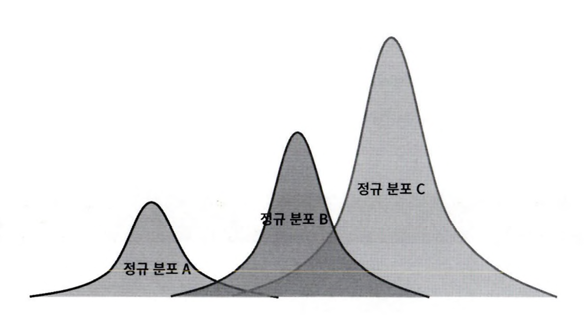

이 세 개의 정규 분포를 합치면 다음 형태가 될 것이다.

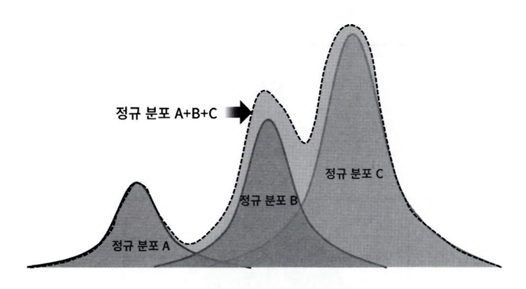

군집화를 수행하려는 실제 데이터 세트의 데이터 분포가 다음과 같다면 쉽게 이 데이터 세트가 정규 분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있다.

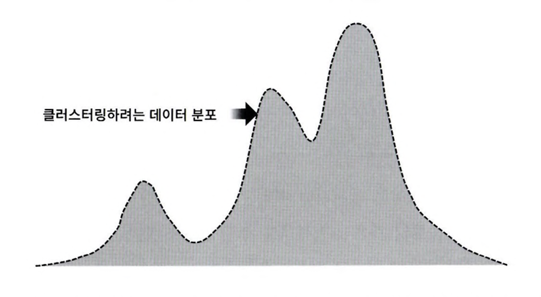

전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화을 수행하는 것이 GMM 군집화 방식이다. 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.

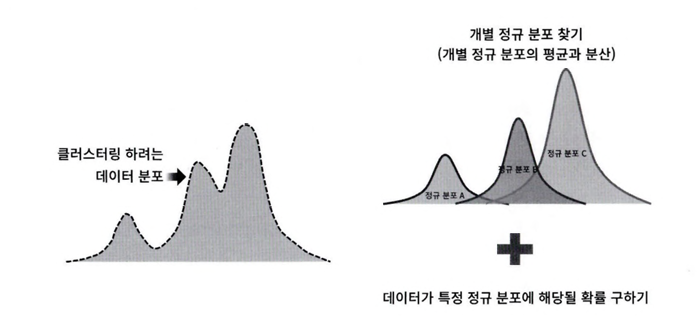

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것이다.


* 개별 정규 분포의평균과 분산
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률


이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용합니다. EM 알
고리즘에 대한 설명은 더 많은 수학식이 필요하므로 이 책에서는 생략하겠습니다. 사이킷런은 이러한
GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원합니다.

## GMM과 K—평균의 비교
KMeans는 원형의 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 다음은 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한 결과이다. 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다. 결과를 보면 KMeans로 효과적으로 군집화된 것을 알 수 있다.

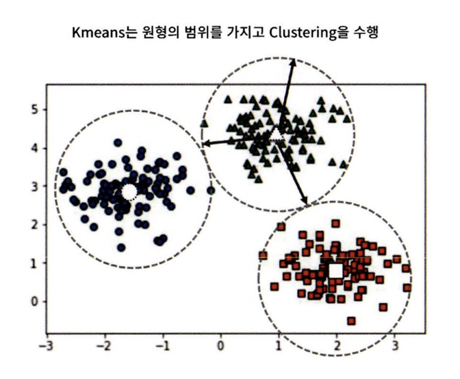

KMeans 군집화는 개별 군집의 중심에서 원형의 범위로 데이터를 군집화했다. 하지만 데이터가 원형의 범위로 퍼져 있지 않는 경우에는 어떨까? KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. 다음에서 해당 데이터 세트를 make_blobs()의 데이터를 변환해 만들어보겠다. 앞으로도 군집을 자주 시각화하므로 이를 위한 별도의 함수
를 만들어 이용하겠다. 함수명은 visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)이다. visualize_cluster_plot() 함수는 인자로 다음과 같은 값을 입력받는다.

* clusterobj: 사이킷런의 군집 수행 객체. KMeans나 GaussiarWixture의 fit( )와 predict( )로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력

* dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame

* label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼명
* iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

## 05. DBSCAN

## DBSCAN 개요

다음으로 밀도 기반 군집화의 대표적인 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise)에 대해 알아보겠다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다. 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 앞에서 소개한 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기가 어렵다. DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

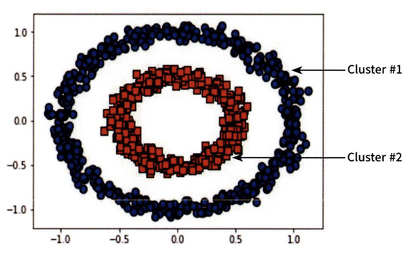

DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(eplsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points이다.

* 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.
* 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.

* 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.
* 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
* 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 한다.
* 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 한다.

1. 다음 그림과 같이 P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명하겠다. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정하겠다.

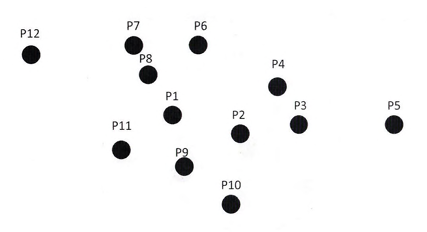

2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신은 P1, 이웃 데이터 P2, P6, P7, P8, P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)이다.

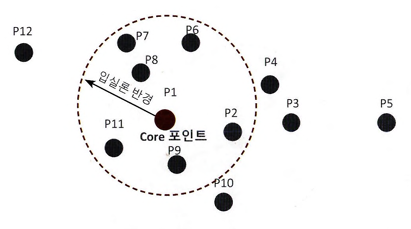

3. 다음으로 P2 데이터 포인트를 살펴보겠다. P2 역시 반경 내에 6개의 데이터(자신은 P2, 이웃 데이터 P1, P3, P4, P9, P10)를 가지고 있으므로 핵심 포인트이다.

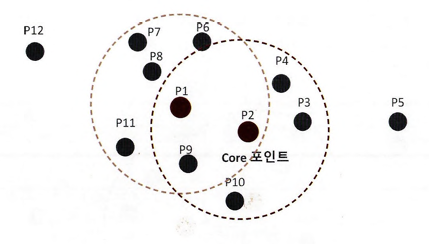

4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능하다.

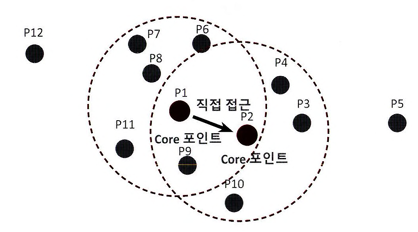

5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.

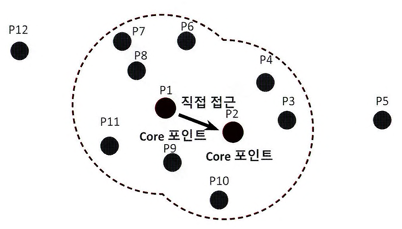

6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없다. 하지만 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있다. 이처럼 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트(Border Point)라고 하낟. 경계 포인트는 군집의 외곽을 형성한다.

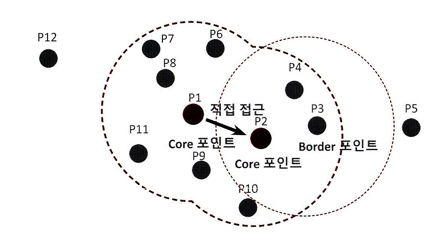

7. 다음 그림의 P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음 포인트(Noise Point)라고 한다.

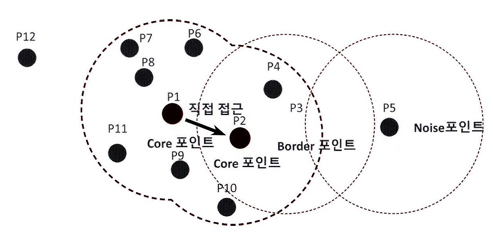

DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.

사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원한다. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있다.

* eps: 입실론 주변 영역의 반경을 의미한다.
* min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미한다(자신의 데이터를 포함한다. 위에서 설명한 min points + 1).